In [1]:
import numpy as np
import pandas as pd

In [2]:
global df
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
422,ham,Siva is in hostel aha:-.,NaN,NaN,NaN
4537,ham,Dare i ask... Any luck with sorting out the car?,NaN,NaN,NaN
2783,ham,"Just arrived, see you in a couple days &lt;3",NaN,NaN,NaN
2874,ham,"Idk. You keep saying that you're not, but sinc...",NaN,NaN,NaN
4649,ham,Finally it has happened..! Aftr decades..! BEE...,NaN,NaN,NaN


In [4]:
df.shape       

(5572, 5)

# DATA CLEANING

In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(5)

,v1,v2
3247,ham,Also track down any lighters you can find
1540,ham,K come to nordstrom when you're done
1123,ham,Good morning princess! How are you?
145,ham,Whats the staff name who is taking class for us?
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...


In [9]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df.sample(5)

,Target,Text
5416,ham,My slave! I want you to take 2 or 3 pictures o...
1098,ham,NO GIFTS!! You trying to get me to throw mysel...
2732,ham,How dare you stupid. I wont tell anything to y...
2768,ham,I am on the way to ur home
4200,ham,Wylie update: my weed dealer carlos went to fr...


In [11]:
#Misssing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [12]:
#Checking for duplicate values
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# EDA(Expolratory Data Analysis)

In [16]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

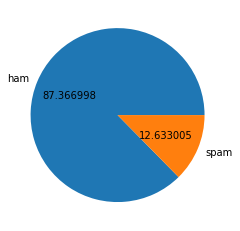

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%3f")
plt.show()

In [19]:
import nltk

In [20]:
df['Num_characters']=df['Text'].apply(len)

C:\Users\user\AppData\Local\Temp\ipykernel_8092\1280058561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_characters']=df['Text'].apply(len)


In [21]:
df.head()

,Target,Text,Num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#For number of words
df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\user\AppData\Local\Temp\ipykernel_8092\253352258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
df.head()

,Target,Text,Num_characters,Num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#For number of sentences
df['Num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\user\AppData\Local\Temp\ipykernel_8092\1844234703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [25]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['Num_characters','Num_words','Num_sentence']].describe()

,Num_characters,Num_words,Num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [28]:
df['Target'] = encoder.fit_transform(df['Target'])

C:\Users\user\AppData\Local\Temp\ipykernel_8092\478920943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = encoder.fit_transform(df['Target'])


In [29]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
#For Ham
df[df['Target']==0][['Num_characters','Num_words','Num_sentence']].describe()

,Num_characters,Num_words,Num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#For spam 
df[df['Target']==1][['Num_characters','Num_words','Num_sentence']].describe()

,Num_characters,Num_words,Num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [32]:
import seaborn as sns

<AxesSubplot:xlabel='Num_characters', ylabel='Count'>

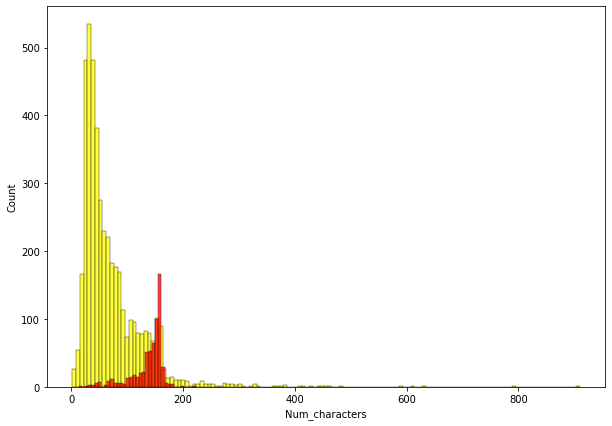

In [33]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Target'] == 0]['Num_characters'],color='yellow')
sns.histplot(df[df['Target'] == 1]['Num_characters'],color='red')

<AxesSubplot:xlabel='Num_words', ylabel='Count'>

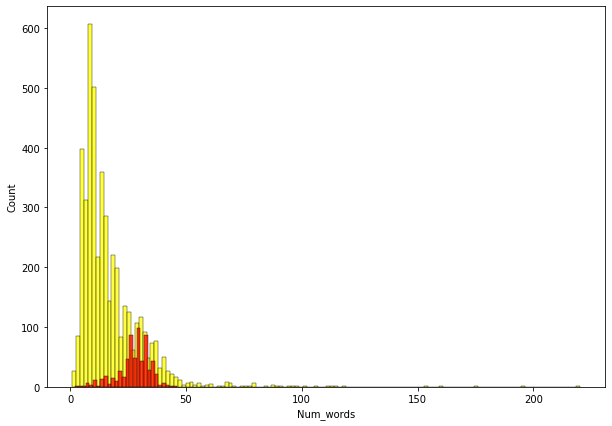

In [34]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Target'] == 0]['Num_words'],color='yellow')
sns.histplot(df[df['Target'] == 1]['Num_words'],color='red')

<AxesSubplot:xlabel='Num_sentence', ylabel='Count'>

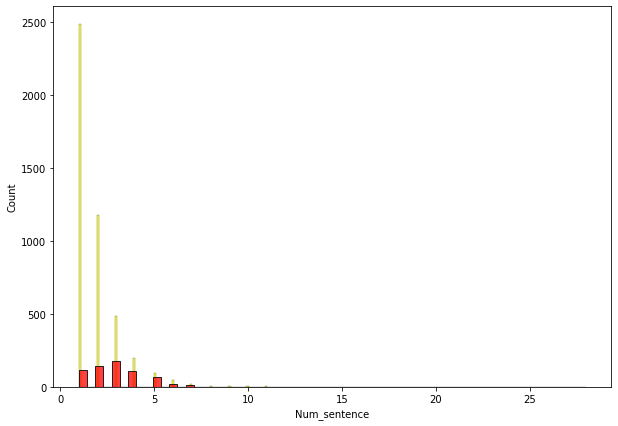

In [35]:
plt.figure(figsize=(10,7))
sns.histplot(df[df['Target'] == 0]['Num_sentence'],color='yellow')
sns.histplot(df[df['Target'] == 1]['Num_sentence'],color='red')

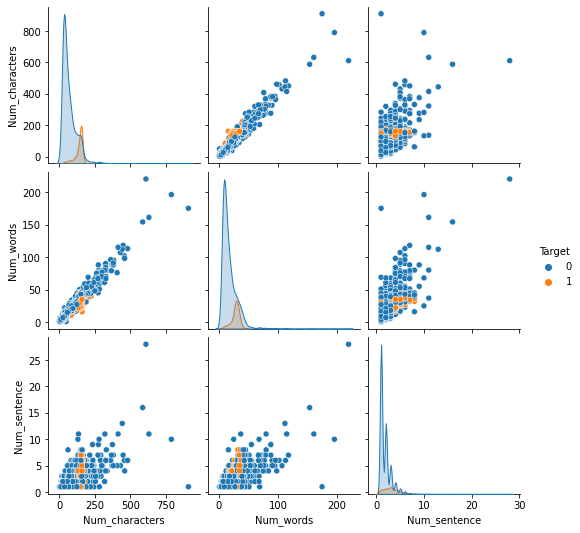

In [36]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

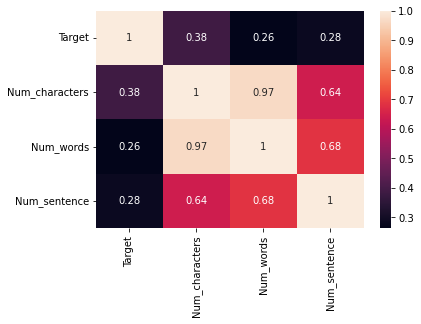

In [37]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing
-Lower case
-Tokenization
-Removing special characters
-Removing stop words and punctuation
-Stemming

In [39]:
def transform_Text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
    
    Text = y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [40]:
from nltk.corpus import stopwords

In [41]:
import string

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [43]:
transform_Text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
transform_Text("Hello! I am Nikhil Sharma.I am computer science engineering students.I enjoy coding.")

'hello nikhil comput scienc engin enjoy code'

In [45]:
df['transformed_Text'] = df['Text'].apply(transform_Text)

C:\Users\user\AppData\Local\Temp\ipykernel_8092\4177870756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_Text'] = df['Text'].apply(transform_Text)


In [46]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
#For SPAM WORDS
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_Text'].str.cat(sep=" "))

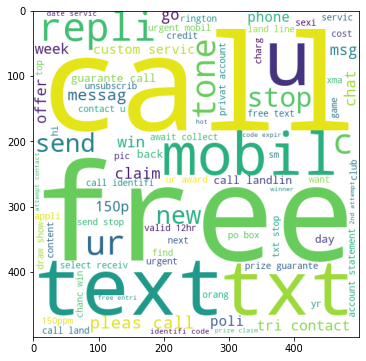

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
#For HAM WORDS
ham_wc = wc.generate(df[df['Target'] == 1]['transformed_Text'].str.cat(sep=" "))

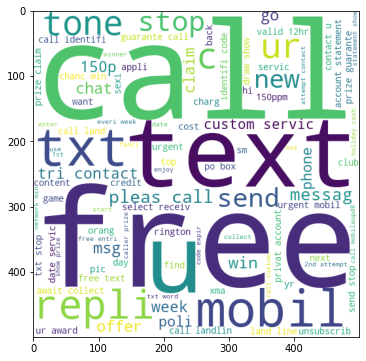

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
df.head()

,Target,Text,Num_characters,Num_words,Num_sentence,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


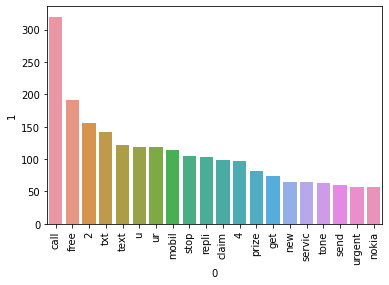

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35394

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


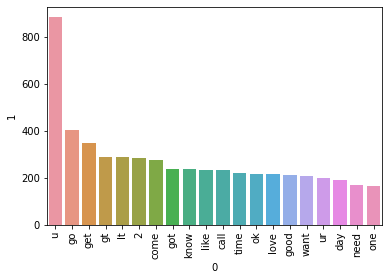

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_Text']).toarray()

In [63]:
X.shape

(5169, 3000)

In [64]:
y = df['Target'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
mnb = MultinomialNB()

In [69]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
from sklearn.naive_bayes import MultinomialNB

In [71]:
mnb = MultinomialNB()

In [72]:
clfs = {'NB': mnb}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [77]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9709864603481625, 1.0)

In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))